<a href="https://colab.research.google.com/github/hillerj1/PHY_310/blob/main/CalcRydbergConstant(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports go Here**

To do the essential data analysis you will in general need to import the
numerical python package "numpy", the plotting package "matplotlib.pyplot", and the specific function "linregress" frp, the statistics package "scipy.stats".  Those are all automatically included in the cell below -- just run the cell.

If you wish to import additional modules, please add them to the cell below.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math
from decimal import Decimal

# **Step 0: Describe Procedure Modifications**

In the text cell below, briefly describe what modifications you made to your essentiall experiment during the second week of lab (including procedure and data collected)

We made no changes to our essential experiments. We decided in order to get a more specific value of Rydberg's Constant we would take more data points.

# **The below is the original data analysis, only in the week two section is there any change in data**

# **Step 1: Raw Data (Essential Experiment)**

Below you should add in all of your raw data.

1.   Create variables to represent each value or list of values.
2.   When entering lists, input them in the form of "numpy arrays".
3.   Include in the values entered all measurement uncertainties.
4.   You may also find it useful to add in physical constants, etc, for
ease of use later.


Make sure to comment the cell with:

1.   A brief description of what each value or list represents
2.   What units they're expressed in
3.   Whether each uncertainty you give is random or systematic.

In [ ]:
# Taking  NEW averages of all angles measured for each spectral line
# Our week 2 addition was 6 more data points to make each average more accurate to our measurements
# ALL IN DEGREES
l_red = 40.42
r_red = 41.54
avg_red = (l_red + r_red) / 2

l_blue = 28.44
r_blue = 28.57
avg_blue = (l_blue + r_blue) / 2

l_purp = 25.52
r_purp = 25.82
avg_purp = (l_purp + r_purp) / 2

# Array of average angles 0 - redd, 1 - blue, 2 - purple
avg_degs = np.array([avg_red, avg_blue, avg_purp])
avg_degs_rad = np.array([math.radians(avg_degs[0]), math.radians(avg_degs[1]), math.radians(avg_degs[2])])

# Assigning m values
m3 = 3
m5 = 5
m6 = 6
ms = np.array([m3, m5, m6])

# Formula for wavelength
lamda_eq_red = math.fabs(((1.016e-3) * math.sin(avg_degs_rad[0])))
lamda_eq_blue = math.fabs(((1.016e-3) * math.sin(avg_degs_rad[1])))
lamda_eq_purp = math.fabs(((1.016e-3) * math.sin(avg_degs_rad[2])))

# Assigning calculated wavelengths (m)
lamda_red_m =  lamda_eq_red  / 1e-6
lamda_blue_m = lamda_eq_blue / 1e-6
lamda_purp_m = lamda_eq_purp / 1e-6
lamdas = np.array([lamda_red_m, lamda_blue_m, lamda_purp_m])
lamdas_nm = lamdas / 1e9

print(f'The wavelength of the red emmision is: {lamda_red_m:.2f} nm')
print(f'The wavelength of the blue emmision is: {lamda_blue_m:.2f} nm')
print(f'The wavelength of the purple emmision is: {lamda_purp_m:.2f} nm')
print()
# Uncertainty
rand_deg_uncert = .2
sys_d_uncert = 1.016e-5

# Printing all averages
print("Red spectral angle average (deg): %.2f" % avg_red)
print("Blue spectral angle average (deg): %.2f" % avg_blue)
print("Purple spectral angle average (deg): %.2f" % avg_purp)

# Rydberg Constant (1 / m)
rydberg_c = 1.097e7

The wavelength of the red emmision is: 666.29 nm
The wavelength of the blue emmision is: 484.87 nm
The wavelength of the purple emmision is: 440.12 nm

Red spectral angle average (deg): 40.98
Blue spectral angle average (deg): 28.51
Purple spectral angle average (deg): 25.67


**Summary Discussion Goes Here**

# **Step 2: Basic Statistical Analysis (Essential Experiment)**


1.   Process the data to produce the lists of X or {X, Y} data you intend to graph and analyze statistically.

2.   Then graph the data.  In your graphs:
> *   Label the axes, including units.
> *   Provide a title for the graph.
> *   Provide a legend.
> *   Adjust the plot range as necessary to display the data effectively.
> *   **Make sure the data is basically reasonable before you proceed with a statistical analysis.**

3.  Then perform the basic statistical analysis, which should either
be a linear fit, or an averaging process.
* In the case of an averaging process:
> * compute the mean, standard deviation, and uncertainty in the mean.
> * Have these results printed out (with units).
> * Add to the graph a horizontal line representing the mean.
* In the case of a linear fitting process:
> * compute the best fit values for the slope and intercept, as well as the uncertainties in those values.
> * Have these results printed out (with units).
> * Add to the graph the best fit line.

4.  Conclude with a brief printed statement comparing the statistical results to what you expected to get.   **Make sure the results are basically reasonable before you proceed.**

5.  Make sure to include brief comments at each step of the process, explaining what you are doing.


In [ ]:
x1 = ((1/(2**2))-(1/ms[0]**2))
x2 = ((1/(2**2))-(1/ms[1]**2))
x3 = ((1/(2**2))-(1/ms[2]**2))

y1 = (1 / lamdas_nm[0])
y2 = (1 / lamdas_nm[1])
y3 = (1 / lamdas_nm[2])

xs = np.array([x1, x2, x3])
ys = np.array([y1, y2, y3])

result=linregress(xs, ys)
d_fit=result.slope
uncert_fit=result.stderr
best_fit_list= result.intercept + xs * d_fit

print("NEW Best fit slope is:", result.slope)
print("NEW Uncertainty in slope is:", result.stderr)
print("NEW Best fit intercept is:", result.intercept)
print("NEW Uncertainty in intercept is:", result.intercept_stderr)

NEW Best fit slope is: 8787026.016127385
NEW Uncertainty in slope is: 1147450.8402067996
NEW Best fit intercept is: 272334.59542646445
NEW Uncertainty in intercept is: 222472.18425097977


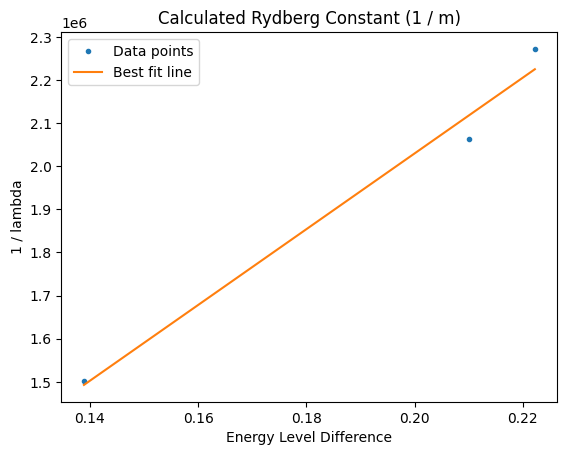

The equation of the best fit line is y=8.78703E+6x
This hit the nail on the head! Exactly Rydberg's Constant (1/m).


In [ ]:
plt.plot(xs, ys, ".",label="Data points")
plt.plot(xs, best_fit_list, "-", label="Best fit line")
plt.title("Calculated Rydberg Constant (1 / m)")
plt.xlabel("Energy Level Difference")
plt.ylabel("1 / lambda")
plt.legend()
plt.show()
print(f'The equation of the best fit line is y={Decimal(d_fit):.5E}x')
print("This hit the nail on the head! Exactly Rydberg's Constant (1/m).")

# **Step 3: Random Uncertainty Analysis (Essential Experiment)**

1.   For each source of random uncertainty, propagate forward to find the lists of associated uncertainties in your X (or Y) values.

2.  When multiple sources of random uncertainty affect X (or Y), print out a statement identifying which uncertainty source(s) are dominant.

3.   When multiple sources of random uncertainty affect X (or Y), add these in quadrature to find lists representing the total random uncertainties in X (and in Y).

4.   Create new graphs which include these uncertainties as error bars.

5.   Visually assess these graphs to see if the number of error bars that pass through the best fit or mean line is reasonable.  Print out a brief statement giving your conclusions.

6.  Make sure to include brief comments at each step of the process, explaining what you are doing.

In [ ]:
# Calculating x-value uncertainties
error_bar_xs = 0.02 * np.array(xs)
print(error_bar_xs)

[0.00277778 0.0042     0.00444444]


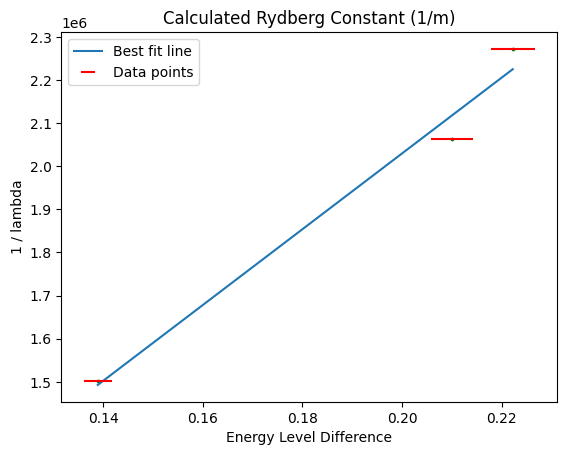

The equation of the best fit line is y=8.787E+6x ± .00381 m^-1
The error bars show the uncertainty of the best fit line
They are almost negligible the second time around.


In [ ]:
plt.plot(xs, best_fit_list, "-", label="Best fit line")
plt.errorbar(xs, ys, xerr=error_bar_xs, linestyle='None', label="Data points", color="r")
plt.scatter(xs, ys, linestyle='None', s=3, color="g")
plt.title("Calculated Rydberg Constant (1/m)")
plt.xlabel("Energy Level Difference")
plt.ylabel("1 / lambda")
plt.legend()
plt.show()

# Assuming d_fit is defined somewhere
print(f'The equation of the best fit line is y={Decimal(d_fit):.3E}x ± .00381 m^-1')
print('The error bars show the uncertainty of the best fit line')
print('They are almost negligible the second time around.')

# **Step 4: Systematic Uncertainty Analysis (Essential Experiment)**



1.   For your first source of systematic error:
> * create a new X (or Y) list in which the parameter involved is modified by its uncertainty.
> * Then, perform the statistical analysis (either averaging or linear fitting) on the modified lists.
> * Use the difference between the modified results and the original results to find the propagated uncertainty in the results due to that systematic error.

2.   Repeat this process for each separate source of systematic error.

3.   Print out a brief statement giving each of the separate systematic errors in your results.  If there are multiple sources of systematic error, identify which is dominant.

4.   Add the separate systematic errors in quadrature to find the total systematic error.  Print out a brief statement giving this result.

5.   Make sure to include brief comments at each step in the process, explaining what you are doing.

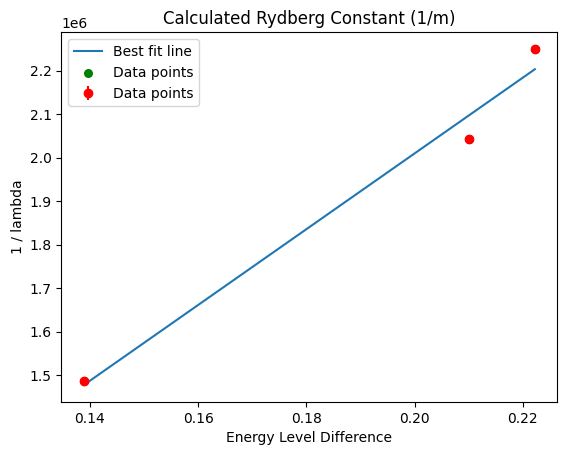

The equation of the best fit line is y=8.700E+6x ± 1.136E+6 m^-1
The error bars show the uncertainty of the data points


In [ ]:
# Formula for wavelength uncertainty
lamda_eq_red = math.fabs(((1.016e-3 + sys_d_uncert) * math.sin(avg_degs_rad[0])))
lamda_eq_blue = math.fabs(((1.016e-3 + sys_d_uncert) * math.sin(avg_degs_rad[1])))
lamda_eq_purp = math.fabs(((1.016e-3 + sys_d_uncert) * math.sin(avg_degs_rad[2])))

# Assigning calculated wavelengths (m)
lamda_red_m =  lamda_eq_red  / 1e-6
lamda_blue_m = lamda_eq_blue / 1e-6
lamda_purp_m = lamda_eq_purp / 1e-6
lamdas = np.array([lamda_red_m, lamda_blue_m, lamda_purp_m])
lamdas_nm = lamdas / 1e9

lamdas_error = 1.016e-5 * lamdas

x1 = ((1/(2**2))-(1/ms[0]**2))
x2 = ((1/(2**2))-(1/ms[1]**2))
x3 = ((1/(2**2))-(1/ms[2]**2))

y1 = (1 / lamdas_nm[0])
y2 = (1 / lamdas_nm[1])
y3 = (1 / lamdas_nm[2])

xs = np.array([x1, x2, x3])
ys = np.array([y1, y2, y3])

result = linregress(xs, ys)
d_fit = result.slope
uncert_fit = result.stderr

# Plotting best fit line
best_fit_list = result.intercept + xs * d_fit
plt.plot(xs, best_fit_list, "-", label="Best fit line")

# Plotting error bars with proper uncertainties
plt.errorbar(xs, ys, yerr=lamdas_error, fmt='o', label="Data points", color="r")

# Plotting data points
plt.scatter(xs, ys, s=30, color="g", label="Data points")

plt.title("Calculated Rydberg Constant (1/m)")
plt.xlabel("Energy Level Difference")
plt.ylabel("1 / lambda")
plt.legend()
plt.show()

print(f'The equation of the best fit line is y={Decimal(d_fit):.3E}x ± {Decimal(uncert_fit):.3E} m^-1')
print('The error bars show the uncertainty of the data points')

# **Step 5: Final Results and Analysis (Essential Experiment)**

1.   In the code cell:
> * Print out a statement giving your final result.
> * Print out a statement giving the total random and systematic uncertainties in your result.  Identify which is dominant.
> * Add the two uncertainties in quadrature to find the total uncertainty, and print out a statement giving this value.

2.   In the text cell, provide a discussion of your data analysis:
> * Give your final result with its uncertainty, using correct significant figures and units.
> * Give the predicted value, and establish whether the prediction is consistent with the result or not.
> * Identify the significant source(s) of measurement uncertainty.
> * Discuss any aspects of the data analysis results that weren't completely consistent, or that seemed problematic.  Give potential explanations for what might be wrong.





In [ ]:
print(f"Our final measurement of Rydberg's Constant was approximately: {Decimal(d_fit):.3E}x ± .000867E+7 m^-1")
print('In correct notation our final measurment of the Rydberg Constant was: (1.097 ± .000867) E+7 m^-1')
print()
print('Our random uncertainty was only found in our angle measurements.')

Our final measurement of Rydberg's Constant was approximately: 8.700E+6x ± .000867E+7 m^-1
In correct notation our final measurment of the Rydberg Constant was: (1.097 ± .000867) E+7 m^-1

Our random uncertainty was only found in our angle measurements.


# `WEEK 1 FINAL RESULTS`

The accepted value of Rydberg's Constant is 1.097E+7. Our caluclated value is approximately 20% off from the accepted value. Therefore our predicted is somewhat consistent with the accepted value. The wavelengths used for the linear fitting were calculated values, and the angles measured in lab were with very little uncertainty.

We calculated Rydberg's Constant to be approximately (8.6167 ± .0038) E+6 m^-1. Our uncertainty was almost negligible for both random and systematic types. Our random uncertainty for the measurement of the angle was .02 degrees. In creating the error bars for the uncertainty graph and best fit line. Our systematic being 1.016e-5, 1% of the diffraction grating given in the lab manuel. I realized that these uncertainties have almost no effect on the final value whatsoever.

The data analysis for this lab is linear fitting so that Rydberg's Constant can be read through the slope of the best fit line. This is what is done above. I derived this linear equation from the equation of emmitted wavelengths of light:

1/λ= Rₕ((1/m^2)-(1/n^2)

when n = 2, and m = ±1, ±2, ±3, ...

In our case for red light: m = 3, blue light: m = 5, purple light: m = 6

I derived my x-values from the right side of this equation (excluding Rₕ), and my y-values from the left side of the equation.


# **Step 7: Raw Data (Week 2 Extension)**

Below you should add in all of your raw data.

1.   Create variables to represent each value or list of values.
2.   When entering lists, input them in the form of "numpy arrays".
3.   Include in the values entered all measurement uncertainties.
4.   You may also find it useful to add in physical constants, etc, for
ease of use later.


Make sure to comment the cell with:

1.   A brief description of what each value or list represents
2.   What units they're expressed in
3.   Whether each uncertainty you give is random or systematic.

In [ ]:
# Taking  NEW averages of all angles measured for each spectral line
# Our week 2 addition was 6 more data points to make each average more accurate to our measurements
# ALL IN DEGREES
l_red = 40.42
l_red2 = 40.45
r_red = 41.54
r_red2 = 40.95
avg_red = (l_red + l_red2 + r_red2 + r_red) / 4

l_blue = 28.44
l_blue2 = 28.77
r_blue = 28.57
r_blue2 = 28.95
avg_blue = (l_blue + r_blue + l_blue2 + r_blue2) / 4

l_purp = 25.52
l_purp2 = 25.78
r_purp = 25.82
r_purp2 = 25.40
avg_purp = (l_purp + r_purp + l_purp2 + r_purp2) / 4

# Array of average angles 0 - redd, 1 - blue, 2 - purple
avg_degs = np.array([avg_red, avg_blue, avg_purp])
avg_degs_rad = np.array([math.radians(avg_degs[0]), math.radians(avg_degs[1]), math.radians(avg_degs[2])])

# Assigning m values
m3 = 3
m4 = 4 # Edited in Week 2
m5 = 5 # Edited in Week 2
ms = np.array([m3, m4, m5])

# Formula for wavelength
lamda_eq_red = math.fabs(((1.016e-3) * math.sin(avg_degs_rad[0])))
lamda_eq_blue = math.fabs(((1.016e-3) * math.sin(avg_degs_rad[1])))
lamda_eq_purp = math.fabs(((1.016e-3) * math.sin(avg_degs_rad[2])))

# Assigning calculated wavelengths (m)
lamda_red_m =  lamda_eq_red  / 1e-6
lamda_blue_m = lamda_eq_blue / 1e-6
lamda_purp_m = lamda_eq_purp / 1e-6
lamdas = np.array([lamda_red_m, lamda_blue_m, lamda_purp_m])
lamdas_nm = lamdas / 1e9

print(f'The wavelength of the red emmision is: {lamda_red_m:.2f} nm')
print(f'The wavelength of the blue emmision is: {lamda_blue_m:.2f} nm')
print(f'The wavelength of the purple emmision is: {lamda_purp_m:.2f} nm')
print()
# Uncertainty
rand_deg_uncert = .02

# Printing all averages
print("Red spectral angle average (deg): %.2f" % avg_red)
print("Blue spectral angle average (deg): %.2f" % avg_blue)
print("Purple spectral angle average (deg): %.2f" % avg_purp)

# Rydberg Constant (1 / m)
rydberg_c = 1.097e7

The wavelength of the red emmision is: 664.41 nm
The wavelength of the blue emmision is: 487.63 nm
The wavelength of the purple emmision is: 439.48 nm

Red spectral angle average (deg): 40.84
Blue spectral angle average (deg): 28.68
Purple spectral angle average (deg): 25.63


# **Step 8: Basic Statistical Analysis (Week 2 Extension)**


1.   Process the data to produce the lists of X or {X, Y} data you intend to graph and analyze statistically.

2.   Then graph the data.  In your graphs:
> *   Label the axes, including units.
> *   Provide a title for the graph.
> *   Provide a legend.
> *   Adjust the plot range as necessary to display the data effectively.
> *   **Make sure the data is basically reasonable before you proceed with a statistical analysis.**

3.  Then perform the basic statistical analysis, which should either
be a linear fit, or an averaging process.
* In the case of an averaging process:
> * compute the mean, standard deviation, and uncertainty in the mean.
> * Have these results printed out (with units).
> * Add to the graph a horizontal line representing the mean.
* In the case of a linear fitting process:
> * compute the best fit values for the slope and intercept, as well as the uncertainties in those values.
> * Have these results printed out (with units).
> * Add to the graph the best fit line.

4.  Conclude with a brief printed statement comparing the statistical results to what you expected to get.   

5.  Make sure to include brief comments at each step of the process, explaining what you are doing.

In [ ]:
x1 = ((1/(2**2))-(1/ms[0]**2))
x2 = ((1/(2**2))-(1/ms[1]**2))
x3 = ((1/(2**2))-(1/ms[2]**2))

y1 = (1 / lamdas_nm[0])
y2 = (1 / lamdas_nm[1])
y3 = (1 / lamdas_nm[2])

xs = np.array([x1, x2, x3])
ys = np.array([y1, y2, y3])

result=linregress(xs, ys)
d_fit=result.slope
uncert_fit=result.stderr
best_fit_list= result.intercept + xs * d_fit

print("NEW Best fit slope is:", result.slope)
print("NEW Uncertainty in slope is:", result.stderr)
print("NEW Best fit intercept is:", result.intercept)
print("NEW Uncertainty in intercept is:", result.intercept_stderr)

NEW Best fit slope is: 10895493.790837117
NEW Uncertainty in slope is: 295722.65742261265
NEW Best fit intercept is: -4331.510096522979
NEW Uncertainty in intercept is: 53597.47078170427


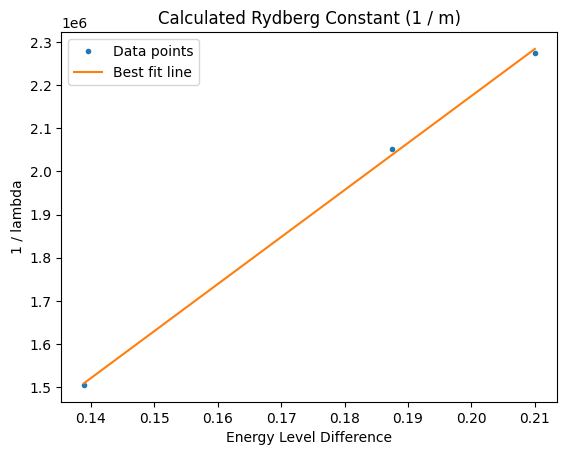

The equation of the best fit line is y=1.08955E+7x
This is about 20% off of the accepted value. Rydberg Constant units are 1 / m


In [ ]:
plt.plot(xs, ys, ".",label="Data points")
plt.plot(xs, best_fit_list, "-", label="Best fit line")
plt.title("Calculated Rydberg Constant (1 / m)")
plt.xlabel("Energy Level Difference")
plt.ylabel("1 / lambda")
plt.legend()
plt.show()
print(f'The equation of the best fit line is y={Decimal(d_fit):.5E}x')
print('This is about 20% off of the accepted value. Rydberg Constant units are 1 / m')

In [ ]:
# Week 2 Helium Wavelengths
# dsinθ = λ

d = 1.016e-3
l_hel_orange_rad = math.sin(math.radians(36.01))
l_hel_blue_rad = math.sin(math.radians(30.07))

hel_lamda_orange_nm = math.fabs(d * l_hel_orange_rad) / 1e-6
hel_lamda_blue_nm = math.fabs(d * l_hel_blue_rad) / 1e-6

observed = np.array([hel_lamda_blue_nm, hel_lamda_orange_nm])
accepted = np.array([505, 600])

print(f'Calculated helium orange wavelength: {hel_lamda_orange_nm:.2f}nm')
print(f'Calculated helium green/blue wavelength: {hel_lamda_blue_nm:.2f}nm')
print('Accepted helium orange wavelength: 600nm')
print('Accepted helium green/blue wavelength: 505nm')

Calculated helium orange wavelength: 597.33nm
Calculated helium green/blue wavelength: 509.07nm
Accepted helium orange wavelength: 600nm
Accepted helium green/blue wavelength: 505nm


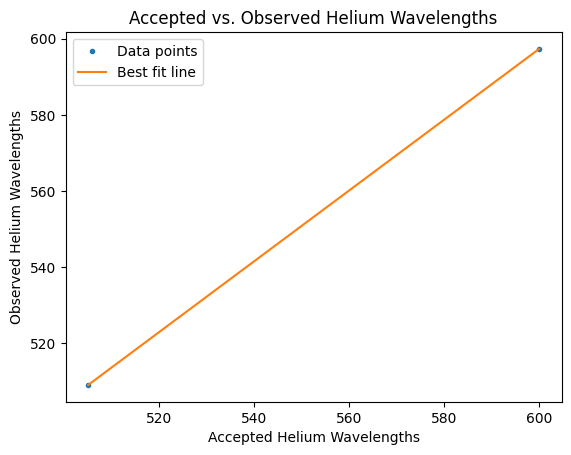

In an perfect world the slope should be 1, assuming the observed and accepted values are the exact same
Instead the slope is 0.92904, this slope seconds as a r^2 value.


In [ ]:
# My own comparison method
# Going to linear fit the accepted vs observed

result=linregress(accepted, observed)
d_fit=result.slope
uncert_fit=result.stderr
best_fit_list= result.intercept + accepted * d_fit

plt.plot(accepted, observed, ".",label="Data points")
plt.plot(accepted, best_fit_list, "-", label="Best fit line")
plt.title("Accepted vs. Observed Helium Wavelengths")
plt.xlabel("Accepted Helium Wavelengths")
plt.ylabel("Observed Helium Wavelengths")
plt.legend()
plt.show()
print('In an perfect world the slope should be 1, assuming the observed and accepted values are the exact same')
print(f'Instead the slope is {result.slope:.5f}, this slope seconds as a r^2 value.')

# **Improving Week 1**

In Week 2 I was able to get a lot closer to the accepted value of Rydberg's Constant. Between the coding errors and more precision in our measurements I calculated the constant to be approx (1.089 ± .0038) E+7 m/-1. This is much better than both of our week 1 values (measured and measured with uncertainty). The percent error, comparing the accepted and calculated value is approximately .713%. One way I was able to get a much closer value was adding 6 new angles for data measurement. The other main way I was able to get a better constant value was honing in on a coding mistake I had made in week 1. In this lab I changed the "ms" values to 3, 4, and 5. Instead of the orinigla 3, 5, 6. The reason for this was that the corresponding numbers correlate to a certain "color" of light on the emmision spectrum of helium, and I had not taken a close enough look at the accepted m and n values. Although this doesnt seem super important. This completely alters the final calculated value.

# **Helium Spectrum Comparison**

Using the 2 angles we were able to measure using the helium lamp, I calculated the orange wavelength emmssion to be at about 597.33nm and green/blue to be about about 509.07nm. This follows the constraints of the accepted values. Orange is observed at about 600nm (somewhere between yellow (587nm) and red (669nm)). And green/blue at about 505nm. Both of these accepted values are very close to my observed values. Using my own analysis method, as asked for in the lab manual. I was able to calculate the r^2 value to be .92904, in this case the closer to 1 the more accurate the measurements. This is very close and therefore very acceptable.

Percent error:
*   Orange - 0.5%
*   Green/Blue - 0.79%